Task 1.1 | Data Preparation
RANDOM FOREST REGRESSOR:
Mean Absolute Error:
0.7260713020833344
Cross-Validation:
[0.97903215 0.98511194 0.9703488  0.98036555 0.97820157]
MLPREGRESSOR:
Mean Absolute Error:
0.7637251465966391
Cross-Validation:
[0.93318307 0.93890126 0.91038427 0.93931748 0.93373672]
SVR REGRESSOR:
Mean Absolute Error:
1.9799526122915598
Cross-Validation:
[0.90742471 0.93223676 0.91380515 0.91515642 0.91056554]
BOX PLOT:


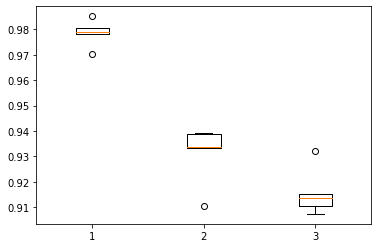

In [25]:
#General
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Miscellaneous
#import random
import numpy as np
import sys

#Regression
    #General
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

    #Regressors
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

#Evaluation
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import mean_squared_error

#Plotting

#from pandas.DataFrame import boxplot
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#CODE vv
#Data importing
print("Task 1.1 | Data Preparation")
inputData = pd.read_excel("ENB2012_data.xlsx", usecols="A,B,C,D,E,F,G,H")
targetData = pd.read_excel("ENB2012_data.xlsx", usecols="I,J")

#SVR only takes one column, so extracting one
SVRTargetData = pd.read_excel("ENB2012_data.xlsx", usecols="I")

#print(inputData)
#print(targetData)

#Conversion to array
targetDataArray = np.array(targetData)
SVRTargetDataArray = np.array(SVRTargetData)
SVRTargetDataTrueArray = np.ravel(SVRTargetDataArray)
#print(SVRTargetDataTrueArray)

#Normalisation
normaliser = MinMaxScaler()
normalisedInputData = normaliser.fit_transform(inputData)
#print(normalisedInputData)

#Input & target data
x_input, x_target, y_input, y_target = train_test_split(normalisedInputData, targetDataArray)
x_inputSVR, x_targetSVR, y_inputSVR, y_targetSVR = train_test_split(normalisedInputData, SVRTargetDataTrueArray)

#Random Forest Regressor v2
print("RANDOM FOREST REGRESSOR:")
RFRegressor = RandomForestRegressor()
RFRegressor.fit(x_input, y_input)
RFROutput = RFRegressor.predict(x_target)
print("Mean Absolute Error:")
meanAbsoluteErrorRFR = mean_absolute_error(y_target, RFROutput)
print(meanAbsoluteErrorRFR)
print("Cross-Validation:")
RFRCrossValidatedScore = cross_val_score(RFRegressor, x_input, y_input)
print(RFRCrossValidatedScore)

#MLPRegressor
print("MLPREGRESSOR:")
regressor = MLPRegressor(max_iter=100000)
regressor.fit(x_input, y_input)
MLPOutput = regressor.predict(x_target)
print("Mean Absolute Error:")
print(mean_absolute_error(y_target, MLPOutput))
print("Cross-Validation:")
MLPCrossValidatedScore = cross_val_score(regressor, x_input, y_input)
print(MLPCrossValidatedScore)

#SVR Regressor
print("SVR REGRESSOR:")
SVRRegressor = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
SVRRegressor.fit(x_inputSVR, y_inputSVR)
SVROutput = SVRRegressor.predict(x_targetSVR)
print("Mean Absolute Error:")
print(mean_absolute_error(y_targetSVR, SVROutput))
print("Cross-Validation:")
SVRCrossValidatedScore = cross_val_score(SVRRegressor, x_inputSVR, y_inputSVR)
print(SVRCrossValidatedScore)

#Plots all cross-validated scores against each other
print("BOX PLOT:")
allCVScores = [RFRCrossValidatedScore, MLPCrossValidatedScore, SVRCrossValidatedScore]
allResultsBoxPlot = plt.boxplot(allCVScores)